# DPGExplainer Saga Benchmarks — Bottleneck (BC)

PCA 2D weighted KDE clouds built from the top-100 Betweenness Centrality (BC) predicates
for multiple scikit-learn **classification datasets** using a RandomForest + DPGExplainer.

## 1. Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from dpg import DPGExplainer


## 2. Helper functions

In [2]:
def pca_kde_plot(X_df, y, weights, title):
    X_clean = X_df.replace([np.inf, -np.inf], np.nan)
    valid_mask = ~X_clean.isna().any(axis=1)
    X_valid = X_clean[valid_mask]
    y_valid = y[valid_mask]
    w_valid = weights[valid_mask]

    pca = PCA(n_components=2, random_state=27)
    X_pca = pca.fit_transform(X_valid)

    plt.style.use('default')
    fig, ax = plt.subplots(1, 1, figsize=(7, 5), facecolor='white')
    # Light red base so low-density areas read as red
    ax.set_facecolor('#f6d6d6')

    kde = sns.kdeplot(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        weights=w_valid,
        fill=True,
        levels=25,
        cmap='turbo_r',
        alpha=0.9,
        thresh=0.0,
        bw_adjust=1.15,
        ax=ax,
    )

    ax.scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        c=y_valid,
        cmap='viridis',
        s=22,
        alpha=0.5,
        edgecolor='k',
        linewidth=0.4,
    )

    # KDE intensity / confidence colorbar (red = higher confidence, blue = lower)
    cbar = fig.colorbar(kde.collections[0], ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Prediction confidence (red = higher, blue = lower)')

    # Class legend
    class_handles = [
        plt.Line2D([0], [0], marker='o', color='w', label=str(name),
                   markerfacecolor=plt.cm.viridis(i / 2), markersize=7,
                   markeredgecolor='k', markeredgewidth=0.4)
        for i, name in enumerate(sorted(set(y_valid)))
    ]
    ax.legend(handles=class_handles, title='Classes', loc='upper right', frameon=True)

    ax.set_title(title)
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    plt.tight_layout()
    plt.show()


## 3. Datasets and DPG bottleneck clouds

Config file not found at 'config.yaml'. Using built-in defaults.
DPG initialized with perc_var=1e-09, decimal_threshold=6, n_jobs=-1

Starting DPG extraction *****************************************
Model Class: RandomForestClassifier
Model Class Module: sklearn.ensemble._forest
Model Estimators:  10
Model Params:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False}
*****************************************************************


100%|██████████| 150/150 [00:02<00:00, 65.20it/s]


Total of paths: 1500
Building DPG...


Processing cases: 100%|██████████| 1500/1500 [00:00<00:00, 7002.27it/s]
/home/barbon/Python/pipeline/DPG/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/barbon/Python/pipeline/DPG/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Extracting graph...


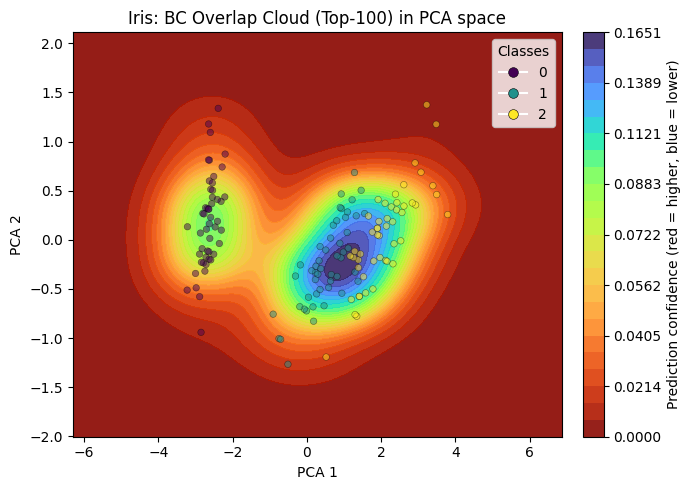

Config file not found at 'config.yaml'. Using built-in defaults.
DPG initialized with perc_var=1e-09, decimal_threshold=6, n_jobs=-1

Starting DPG extraction *****************************************
Model Class: RandomForestClassifier
Model Class Module: sklearn.ensemble._forest
Model Estimators:  10
Model Params:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False}
*****************************************************************


100%|██████████| 178/178 [00:00<00:00, 1562.73it/s]


Total of paths: 1780
Building DPG...


Processing cases: 100%|██████████| 1780/1780 [00:00<00:00, 6521.45it/s]
/home/barbon/Python/pipeline/DPG/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/barbon/Python/pipeline/DPG/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Extracting graph...


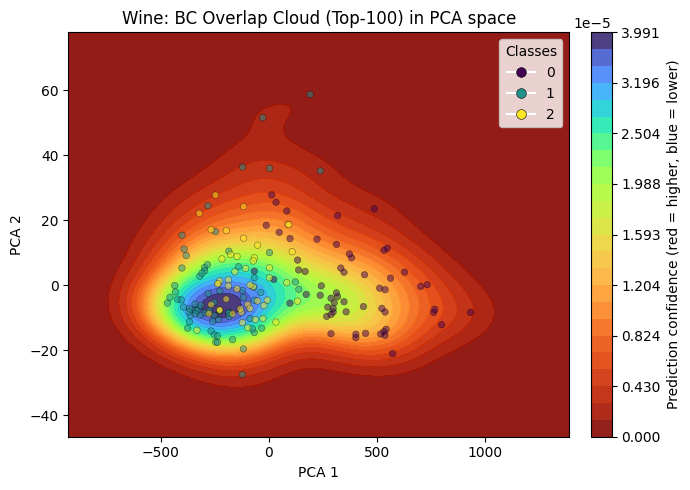

Config file not found at 'config.yaml'. Using built-in defaults.
DPG initialized with perc_var=1e-09, decimal_threshold=6, n_jobs=-1

Starting DPG extraction *****************************************
Model Class: RandomForestClassifier
Model Class Module: sklearn.ensemble._forest
Model Estimators:  10
Model Params:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False}
*****************************************************************


100%|██████████| 569/569 [00:00<00:00, 2552.66it/s]


Total of paths: 5690
Building DPG...


Processing cases: 100%|██████████| 5690/5690 [00:00<00:00, 6269.14it/s]


Extracting graph...


/home/barbon/Python/pipeline/DPG/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/barbon/Python/pipeline/DPG/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


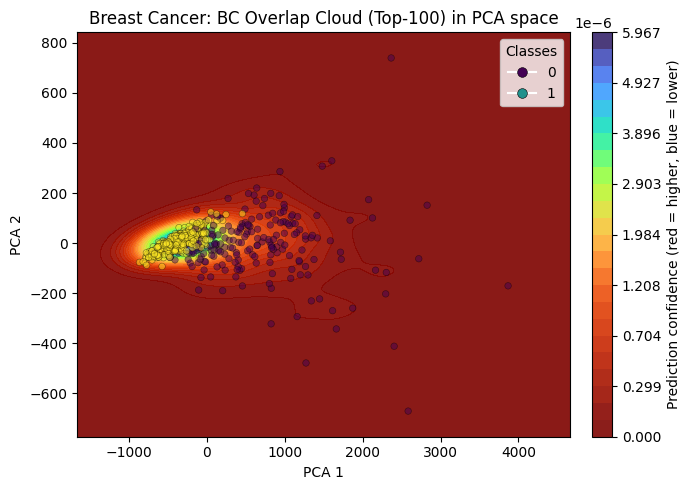

Config file not found at 'config.yaml'. Using built-in defaults.
DPG initialized with perc_var=1e-09, decimal_threshold=6, n_jobs=-1

Starting DPG extraction *****************************************
Model Class: RandomForestClassifier
Model Class Module: sklearn.ensemble._forest
Model Estimators:  10
Model Params:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False}
*****************************************************************


100%|██████████| 1797/1797 [00:00<00:00, 4338.09it/s]


Total of paths: 17970
Building DPG...


Processing cases: 100%|██████████| 17970/17970 [00:02<00:00, 6520.19it/s]


Extracting graph...


In [ ]:
# Ensure helper exists even if cells are run out of order
if 'bc_weights_from_explanation' not in globals():
    def parse_predicate(label):
        match = re.search(r'(.+?)\s*(<=|>)\s*([0-9.]+)', label)
        if not match:
            return None
        feature = match.group(1).strip()
        op = match.group(2)
        value = float(match.group(3))
        return feature, op, value

    def bc_weights_from_explanation(explanation, X_df, top_k=100):
        labels = (
            explanation.node_metrics
            .sort_values('Betweenness centrality', ascending=False)
            .head(top_k)['Label']
            .tolist()
        )
        predicates = [p for p in (parse_predicate(l) for l in labels) if p is not None]
        weights = np.zeros(len(X_df), dtype=float)
        for feature, op, value in predicates:
            if feature not in X_df.columns:
                continue
            vals = X_df[feature].values
            vals = np.where(np.isfinite(vals), vals, np.nan)
            if op == '<=':
                weights += (vals <= value)
            else:
                weights += (vals > value)
        if weights.max() > 0:
            weights = weights / weights.max()
        return weights


datasets = [
    ('Iris', load_iris(as_frame=True)),
    ('Wine', load_wine(as_frame=True)),
    ('Breast Cancer', load_breast_cancer(as_frame=True)),
    ('Digits', load_digits(as_frame=True)),
]

for name, ds in datasets:
    X = ds.data
    y = ds.target

    model = RandomForestClassifier(n_estimators=10, random_state=27)
    model.fit(X, y)

    explainer = DPGExplainer(
        model=model,
        feature_names=X.columns,
        target_names=[str(t) for t in sorted(set(y))],
        config_file='config.yaml',
    )
    explanation = explainer.explain_global(X.values, communities=False)

    weights = bc_weights_from_explanation(explanation, X, top_k=5)
    title = f'{name}: BC Overlap Cloud in PCA space'
    pca_kde_plot(X, y, weights, title)
